# Facial Feature Detection with OpenFace

This notebook uses an open source project [OpenFace](https://github.com/TadasBaltrusaitis/OpenFace) by Tadas Baltrusaitis to detect and track multi-person head motions and facial muscle movements on a given Youtube video. This notebook was inspired by [DL-CoLab-Notebooks](https://github.com/tugstugi/dl-colab-notebooks).

## Install OpenFace
The first code snippet installs all the necessary dependencies and may take a while (30~40 minutes). Go make yourself a cup of coffee and watch some Youtube videos to find the clips you'd like to extract facial features from while your environment sets up.


In [1]:
import os
from os.path import exists, join, basename, splitext

################# Need to revert back to CUDA 10.0 ##################
# Thanks to http://aconcaguasci.blogspot.com/2019/12/setting-up-cuda/-100-for-mxnet-on-google.html
#Uninstall the current CUDA version
!apt-get --purge remove cuda nvidia* libnvidia-*
!dpkg -l | grep cuda- | awk '{print $2}' | xargs -n1 dpkg --purge
!apt-get remove cuda-*
!apt autoremove
!apt-get update

#Download CUDA 10.0
!wget  --no-clobber https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-repo-ubuntu1804_10.0.130-1_amd64.deb
#install CUDA kit dpkg
!dpkg -i cuda-repo-ubuntu1804_10.0.130-1_amd64.deb
!sudo apt-key adv --fetch-keys https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/7fa2af80.pub
!apt-get update
!apt-get install cuda-10-0
#Slove libcurand.so.10 error
!wget --no-clobber http://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64/nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb
#-nc, --no-clobber: skip downloads that would download to existing files.
!apt install ./nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb
!apt-get update
####################################################################

git_repo_url = 'https://github.com/TadasBaltrusaitis/OpenFace.git'
project_name = splitext(basename(git_repo_url))[0]
# clone openface
!git clone -q --depth 1 $git_repo_url

# install new CMake becaue of CUDA10
!wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
!tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local

# Get newest GCC
!sudo apt-get update
!sudo apt-get install build-essential 
!sudo apt-get install g++-8

# install python dependencies
!pip install -q youtube-dl

# Finally, actually install OpenFace
!cd OpenFace && bash ./download_models.sh && sudo bash ./install.sh

Streaming output truncated to the last 5000 lines.
  inflating: opencv-4.1.0/samples/cpp/tutorial_code/core/mat_operations/mat_operations.cpp  
   creating: opencv-4.1.0/samples/cpp/tutorial_code/core/mat_the_basic_image_container/
  inflating: opencv-4.1.0/samples/cpp/tutorial_code/core/mat_the_basic_image_container/mat_the_basic_image_container.cpp  
   creating: opencv-4.1.0/samples/cpp/tutorial_code/features2D/
  inflating: opencv-4.1.0/samples/cpp/tutorial_code/features2D/AKAZE_match.cpp  
   creating: opencv-4.1.0/samples/cpp/tutorial_code/features2D/AKAZE_tracking/
  inflating: opencv-4.1.0/samples/cpp/tutorial_code/features2D/AKAZE_tracking/planar_tracking.cpp  
  inflating: opencv-4.1.0/samples/cpp/tutorial_code/features2D/AKAZE_tracking/stats.h  
  inflating: opencv-4.1.0/samples/cpp/tutorial_code/features2D/AKAZE_tracking/utils.h  
   creating: opencv-4.1.0/samples/cpp/tutorial_code/features2D/Homography/
  inflating: opencv-4.1.0/samples/cpp/tutorial_code/features2D/Homogra

## Detect facial expressions on a test video

We are going to detect facial features on the following Youtube video:

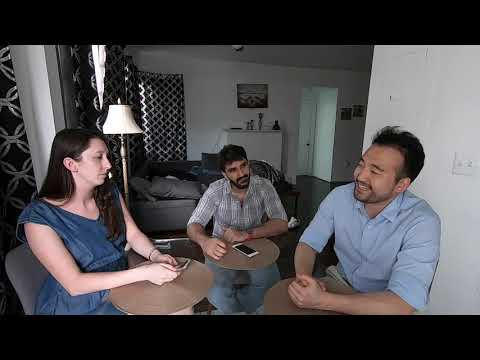

In [ ]:
from IPython.display import YouTubeVideo

# Change the Youtube_ID with the link to your group's video.
YOUTUBE_ID = 'XtA6FQz8BHQ'

YouTubeVideo(YOUTUBE_ID)

Download the above youtube video, cut the first 10 seconds and do the face detection & feature extraction on that clip. This takes about a minute or two. Instead of `FaceLandmarkVidMulti` you may also use `FeatureExtraction` to extract features of a single face or `FaceLandmarkImg` to extract features on a face image. See full description of the arguments [here](https://github.com/TadasBaltrusaitis/OpenFace/wiki/Command-line-arguments). 

In [ ]:
# !rm -rf youtube.mp4
# # download the youtube with the given ID
# !youtube-dl -f 'bestvideo[ext=mp4]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v=$YOUTUBE_ID
# # cut the first 5 seconds
# !ffmpeg -y -loglevel info -i youtube.mp4 -t 10 video.mp4
# clear any previous outputs.
!rm -rf processed2
# detect poses on the these 10 seconds.
!./OpenFace/build/bin/FaceLandmarkVidMulti -f video2.mp4 -out_dir processed2
# convert the result into MP4
!ffmpeg -y -loglevel info -i processed2/video2.avi output.mp4

In [2]:
from google.colab import drive
drive.mount('/gdrive')
# %cd /gdrive
# %cd MyDrive/

Mounted at /gdrive


In [3]:
ques = list(range(20,28))
ques.append('D_1')
ques.append('D_2')

In [4]:
import pandas as pd
import os
all_csvs =  pd.DataFrame()

In [5]:
%cd /

/


In [6]:
os.listdir('gdrive/MyDrive/separate_videos/'+str(20))

['id1.mp4',
 'id5.mp4',
 'id6.mp4',
 'id3.mp4',
 'id4.mp4',
 'id2.mp4',
 'id9.mp4',
 'id10.mp4',
 'id8.mp4',
 'id7.mp4',
 'id11.mp4',
 'id15.mp4',
 'id13.mp4',
 'id14.mp4',
 'id12.mp4',
 'id17.mp4',
 'id16.mp4',
 'id18.mp4',
 'id19.mp4',
 'id22.mp4',
 'id21.mp4',
 'id20.mp4',
 'id23.mp4',
 'id29.mp4',
 'id24.mp4',
 'id28.mp4',
 'id25.mp4',
 'id31.mp4',
 'id30.mp4']

In [ ]:
k=0
for i in ques:
  print(i)
  # /content/gdrive/MyDrive/separate_videos/$i
  files = os.listdir('gdrive/MyDrive/separate_videos/'+str(i))
  print(files)
  
  # print(files)
  for j in files:
    # if i==1 and j<='id29.mp4' :
    #   continue
    if j=='id29.mp4':
      continue 
    print(i,j)
    k+=1
    # if k==1:
    #   continue
    a = 'gdrive/MyDrive/separate_videos/'+str(i)+'/'+j
    !/content/OpenFace/build/bin/FaceLandmarkVidMulti -f $a -out_dir processed
    try:
      df = pd.read_csv('processed/'+j[:-4]+'.csv')
      df['question'] = i
      df['person_id'] = j[:-4]
      if k==1:
        all_csvs = df.copy()
      else:
        all_csvs = all_csvs.append(df)
        all_csvs.to_csv('gdrive/MyDrive/result_files/face_features_final_from_17.csv',index=False)
    except:
      print('ERROR',i,j)

Streaming output truncated to the last 5000 lines.
Reading the PDM module from: /content/OpenFace/build/bin/model/pdms/In-the-wild_aligned_PDM_68.txt....Done
Reading the Triangulations module from: /content/OpenFace/build/bin/model/tris_68.txt....Done
Reading the intensity CEN patch experts from: /content/OpenFace/build/bin/model/patch_experts/cen_patches_0.25_of.dat....Done
Reading the intensity CEN patch experts from: /content/OpenFace/build/bin/model/patch_experts/cen_patches_0.35_of.dat....Done
Reading the intensity CEN patch experts from: /content/OpenFace/build/bin/model/patch_experts/cen_patches_0.50_of.dat....Done
Reading the intensity CEN patch experts from: /content/OpenFace/build/bin/model/patch_experts/cen_patches_1.00_of.dat....Done
Reading part based module....left_eye_28
Reading the landmark detector/tracker from: /content/OpenFace/build/bin/model/model_eye/main_clnf_synth_left.txt
Reading the landmark detector module from: /content/OpenFace/build/bin/model/model_eye/cln

In [ ]:
all_csvs2=all_csvs.copy()

In [ ]:
all_csvs.to_csv('gdrive/MyDrive/result_files/face_features2.csv',index=False)

In [ ]:
a = 'gdrive/MyDrive/separate_videos/'+str(1)+'/id29.mp4'
!/content/OpenFace/build/bin/FaceLandmarkVidMulti -f $a -out_dir processed

Could not find the HAAR face detector location
Reading the landmark detector/tracker from: /content/OpenFace/build/bin/model/main_ceclm_general.txt
Reading the landmark detector module from: /content/OpenFace/build/bin/model/cen_general.txt
Reading the PDM module from: /content/OpenFace/build/bin/model/pdms/In-the-wild_aligned_PDM_68.txt....Done
Reading the Triangulations module from: /content/OpenFace/build/bin/model/tris_68.txt....Done
Reading the intensity CEN patch experts from: /content/OpenFace/build/bin/model/patch_experts/cen_patches_0.25_of.dat....Done
Reading the intensity CEN patch experts from: /content/OpenFace/build/bin/model/patch_experts/cen_patches_0.35_of.dat....Done
Reading the intensity CEN patch experts from: /content/OpenFace/build/bin/model/patch_experts/cen_patches_0.50_of.dat....Done
Reading the intensity CEN patch experts from: /content/OpenFace/build/bin/model/patch_experts/cen_patches_1.00_of.dat....Done
Reading part based module....left_eye_28
Reading the l

In [ ]:
!rm -rf processed
# detect poses on the these 10 seconds.
!./OpenFace/build/bin/FaceLandmarkVidMulti -f video2.mp4 -out_dir processed
# convert the result into MP4
!ffmpeg -y -loglevel info -i processed/video.avi output.mp4

Finally, visualize the result:

In [ ]:
def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

show_local_mp4_video('output.mp4', width=960, height=720)

Output hidden; open in https://colab.research.google.com to view.

# Extra: Here are some tips for loading and plotting the data. 

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd, seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt 

# Load data
df = pd.read_csv('processed/video.csv')
# Remove empty spaces in column names.
df.columns = [col.replace(" ", "") for col in df.columns]
# Print few values of data.
print(f"Max number of frames {df.frame.max()}", f"\nTotal shape of dataframe {df.shape}")
df.head()

Max number of frames 1364 
Total shape of dataframe (1472, 714)


,frame,face_id,timestamp,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,eye_lmk_x_0,eye_lmk_x_1,eye_lmk_x_2,eye_lmk_x_3,eye_lmk_x_4,eye_lmk_x_5,eye_lmk_x_6,eye_lmk_x_7,eye_lmk_x_8,eye_lmk_x_9,eye_lmk_x_10,eye_lmk_x_11,eye_lmk_x_12,eye_lmk_x_13,eye_lmk_x_14,eye_lmk_x_15,eye_lmk_x_16,eye_lmk_x_17,eye_lmk_x_18,eye_lmk_x_19,eye_lmk_x_20,eye_lmk_x_21,eye_lmk_x_22,eye_lmk_x_23,eye_lmk_x_24,eye_lmk_x_25,eye_lmk_x_26,...,p_29,p_30,p_31,p_32,p_33,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r,AU01_c,AU02_c,AU04_c,AU05_c,AU06_c,AU07_c,AU09_c,AU10_c,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,1,0,0.00,0.98,1,0.097860,0.213485,-0.972033,-0.058000,0.217633,-0.974306,0.020,0.218,263.2,264.2,266.6,269.1,270.1,269.3,266.7,264.2,260.2,261.5,263.5,266.1,268.8,271.0,272.5,270.8,268.4,265.9,263.6,261.6,265.7,266.7,267.8,268.2,267.8,266.7,265.6,...,-0.025,-0.003,0.002,-0.030,0.005,1.87,0.30,0.71,0.89,0.42,0.00,0.0,0.0,0.81,0.63,0.00,0.0,0.00,0.0,0.0,0.0,1.10,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,0,0.04,0.98,1,0.092483,0.220265,-0.971046,-0.058462,0.224310,-0.972763,0.018,0.225,263.1,264.1,266.5,268.9,269.9,269.1,266.5,264.1,260.1,261.4,263.4,265.9,268.7,270.8,272.4,270.6,268.3,265.8,263.5,261.5,265.5,266.6,267.6,268.1,267.6,266.6,265.5,...,-0.024,0.004,-0.011,-0.049,0.020,1.92,0.32,0.54,0.01,0.51,0.11,0.0,0.0,0.87,0.67,0.00,0.0,0.00,0.0,0.0,0.0,0.49,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3,0,0.08,0.98,1,0.091898,0.222224,-0.970655,-0.059112,0.226189,-0.972288,0.017,0.227,263.1,264.0,266.5,268.9,269.9,269.1,266.5,264.1,260.1,261.4,263.4,265.9,268.6,270.8,272.3,270.6,268.3,265.8,263.5,261.5,265.5,266.6,267.6,268.1,267.6,266.5,265.5,...,-0.024,0.003,-0.013,-0.049,0.020,1.96,0.27,0.55,0.00,0.53,0.21,0.0,0.0,0.86,0.85,0.00,0.0,0.00,0.0,0.0,0.0,0.51,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,4,0,0.12,0.98,1,0.091577,0.223163,-0.970470,-0.059357,0.227088,-0.972064,0.017,0.228,263.1,264.0,266.5,268.9,269.9,269.1,266.5,264.1,260.1,261.4,263.4,265.9,268.6,270.8,272.3,270.6,268.3,265.8,263.5,261.5,265.5,266.6,267.6,268.1,267.6,266.5,265.5,...,-0.024,0.004,-0.014,-0.049,0.020,1.89,0.27,0.56,0.00,0.52,0.17,0.0,0.0,0.85,0.78,0.00,0.0,0.00,0.0,0.0,0.0,0.51,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5,0,0.16,0.98,1,0.092089,0.218381,-0.971509,-0.058506,0.222902,-0.973084,0.017,0.223,262.7,263.7,266.1,268.5,269.6,268.8,266.2,263.7,259.7,261.0,263.0,265.6,268.3,270.5,272.1,270.3,267.9,265.4,263.1,261.1,265.1,266.2,267.3,267.7,267.3,266.2,265.1,...,-0.036,0.002,-0.018,-0.048,0.022,1.90,0.53,0.42,0.03,0.40,0.00,0.0,0.0,0.83,0.90,0.05,0.0,0.01,0.0,0.0,0.0,0.00,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# See how many unique faces there are
print("Number of unique faces: ", len(df.face_id.unique()), "\nList of face_id's: ", df.face_id.unique())

Number of unique faces:  2 
List of face_id's:  [0 1]


It looks like we see 4 faces instead of 3! Let's see how much confidence the algorithm had for detecting each face. 


In [ ]:
df.groupby('face_id').mean()['confidence']

face_id
0    0.978387
1    0.136852
Name: confidence, dtype: float64

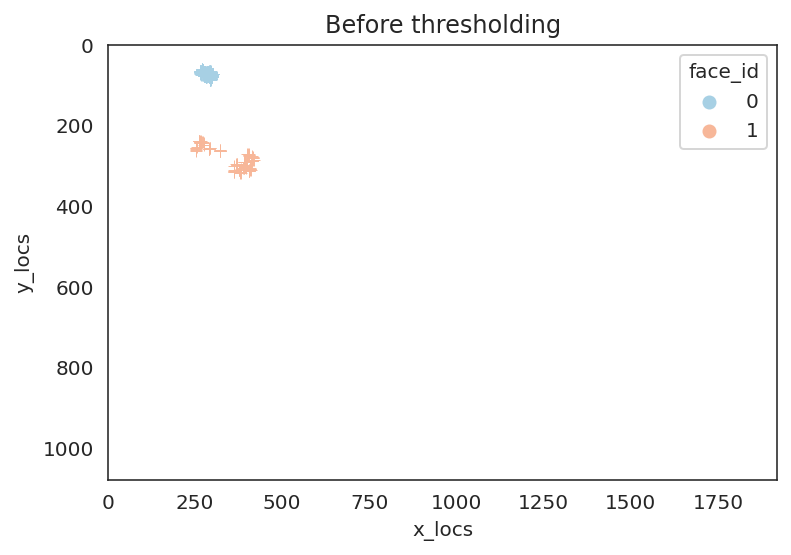

In [ ]:
import re
x_regex_pat = re.compile(r'^x_[0-9]+$')
y_regex_pat = re.compile(r'^y_[0-9]+$')
x_locs = df.columns[df.columns.str.contains(x_regex_pat)]
y_locs = df.columns[df.columns.str.contains(y_regex_pat)]
no_unique_faces = len(df.face_id.unique())
palette = sns.color_palette("RdBu_r", no_unique_faces)

avg_face_df = pd.DataFrame({'x_locs':df[x_locs].mean(axis=1), 'y_locs':df[y_locs].mean(axis=1), 'face_id': df.face_id})
ax = sns.scatterplot(x='x_locs', y='y_locs', hue = 'face_id', data=avg_face_df, marker="+", palette=palette)
ax.set(xlim=[0, 1920], ylim=[1080,0], title="Before thresholding");

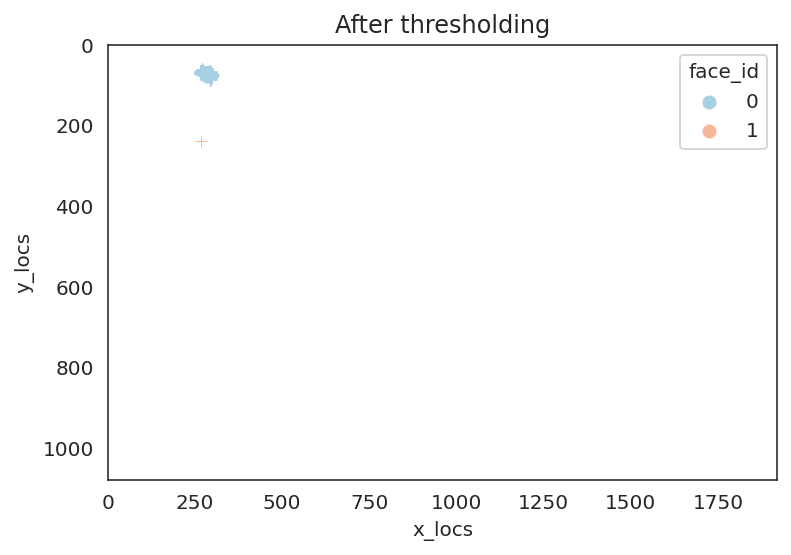

In [ ]:
avg_face_df_conf = avg_face_df[df.confidence>=.80]
no_unique_faces = len(avg_face_df_conf.face_id.unique())
ax = sns.scatterplot(x='x_locs', y='y_locs', hue = 'face_id', data=avg_face_df_conf, marker="+", palette=palette[:no_unique_faces])
ax.set(xlim=[0, 1920], ylim=[1080,0], title="After thresholding");

Let's clean our data with a threshold of 80% confidence and plot the AU trajectories for all AUs.


List of AU columns: Index(['AU01_r', 'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r', 'AU09_r',
       'AU10_r', 'AU12_r', 'AU14_r', 'AU15_r', 'AU17_r', 'AU20_r', 'AU23_r',
       'AU25_r', 'AU26_r', 'AU45_r'],
      dtype='object')


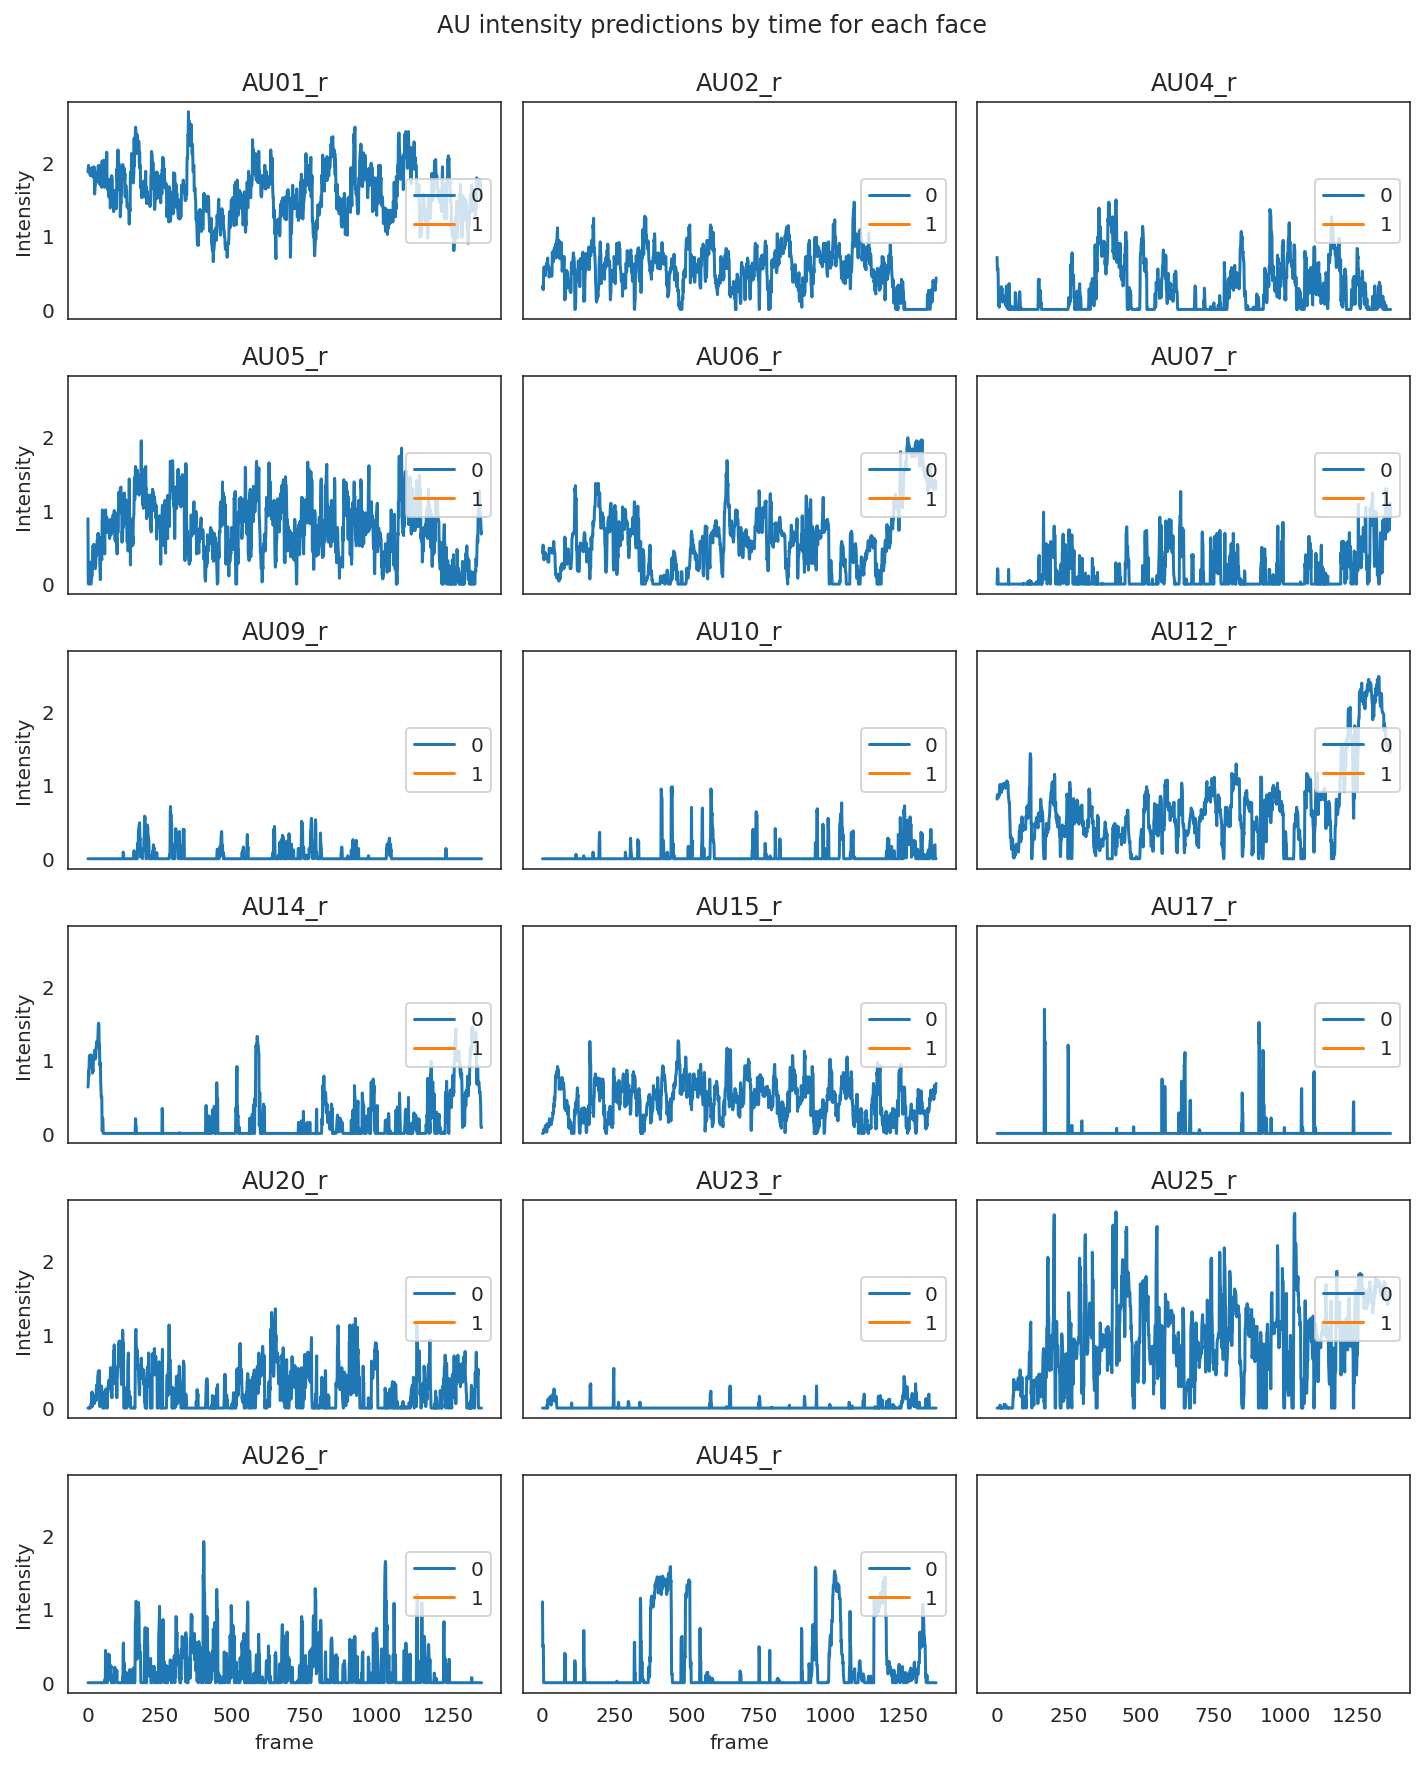

In [ ]:
# Threshold data by 80%
df_clean = df[df.confidence>=.80]
# Plot all Action Unit time series. 
au_regex_pat = re.compile(r'^AU[0-9]+_r$')
au_columns = df.columns[df.columns.str.contains(au_regex_pat)]
print("List of AU columns:", au_columns)
f,axes = plt.subplots(6, 3, figsize=(10,12), sharex=True, sharey=True)
axes = axes.flatten()
for au_ix, au_col in enumerate(au_columns):
    sns.lineplot(x='frame', y=au_col, hue='face_id', data=df_clean, ax=axes[au_ix])
    axes[au_ix].set(title=au_col, ylabel='Intensity')
    axes[au_ix].legend(loc=5)
plt.suptitle("AU intensity predictions by time for each face", y=1.02)
plt.tight_layout()

We could also compare how synchronized each individuals are to one another during the interaction by using a simple Pearson correlation.

In [ ]:
# Let's compare how much AU12 (smiling) activity occurs at similar times across people.
df_clean.pivot(index='frame', columns='face_id', values='AU12_r').corr()

face_id,0,1
face_id,,
0,1.0,NaN
1,NaN,NaN


# Lastly, here is just a few lines of code to get you started on working with gaze directions. 

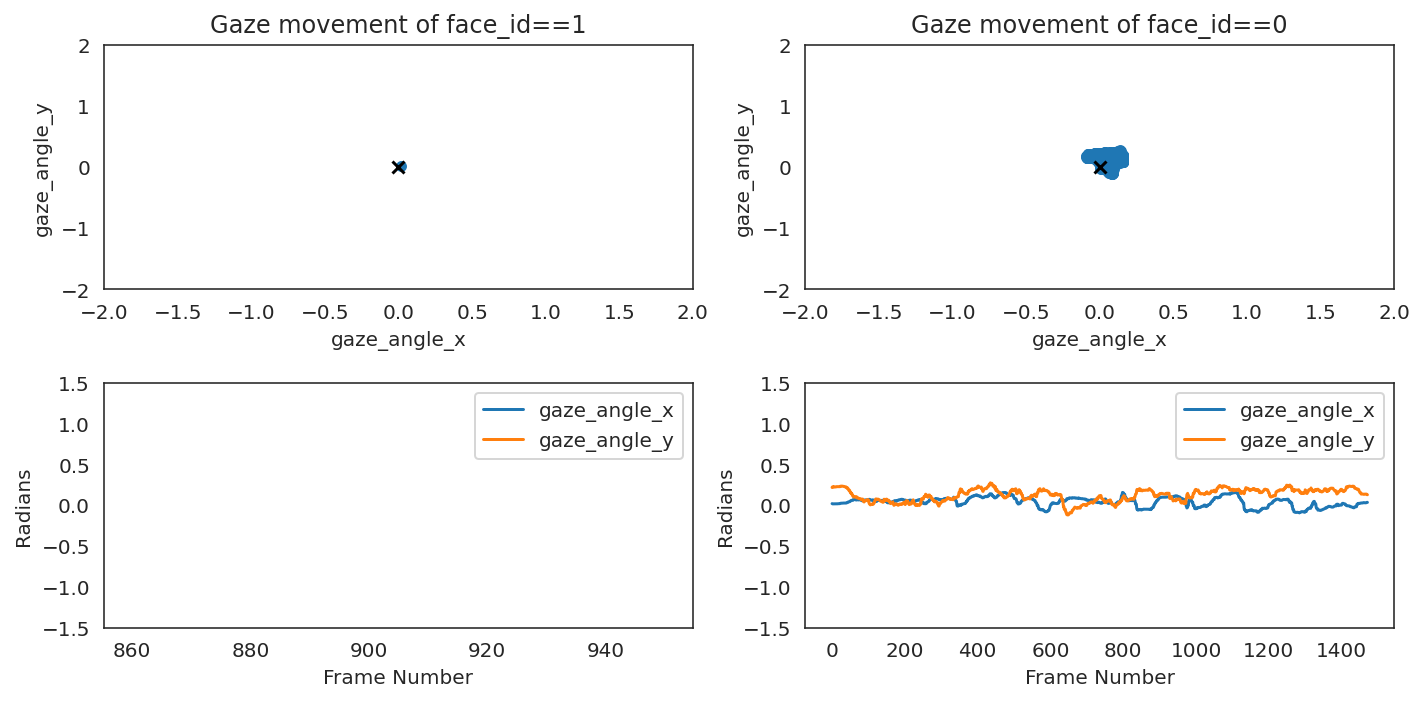

In [ ]:
f,axes = plt.subplots(2,len(df_clean.face_id.unique()), figsize=(10,5))
for faces_ix, face_id in enumerate(df_clean.face_id.unique()[::-1]):
  df_clean.query(f'face_id=={face_id}').plot.scatter(x='gaze_angle_x', y='gaze_angle_y', ax=axes[0][faces_ix])
  axes[0][faces_ix].scatter(0,0, marker='x', color = 'k') # draw origin.
  axes[0][faces_ix].set(xlim=[-2,2], ylim=[-2,2], title=f'Gaze movement of face_id=={face_id}')
  df_clean.query(f'face_id=={face_id}')[['gaze_angle_x', 'gaze_angle_y']].plot(ax=axes[1][faces_ix])
  axes[1][faces_ix].set(ylim=[-1.5,1.5], xlabel='Frame Number', ylabel="Radians")
plt.tight_layout()
plt.show()

# That's it for now. Hope you enjoyed this tutorial.

## Additional resources
*   [OpenFace Github Page](https://github.com/TadasBaltrusaitis/OpenFace)
*   [Medium article on more ways to assess synchrony in time series data](https://towardsdatascience.com/four-ways-to-quantify-synchrony-between-time-series-data-b99136c4a9c9)
*   [Comparison of facial emotion recognition software: OpenFace vs Affectiva vs FACET](https://medium.com/@jinhyuncheong/face-analysis-software-comparison-affectiva-affdex-vs-openface-vs-emotient-facet-5f91a4f12cbb)

*This notebook was prepared by [Jin Hyun Cheong](http://jinhyuncheong.com).*

In [ ]:
df.head()

,frame,face_id,timestamp,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,eye_lmk_x_0,eye_lmk_x_1,eye_lmk_x_2,eye_lmk_x_3,eye_lmk_x_4,eye_lmk_x_5,eye_lmk_x_6,eye_lmk_x_7,eye_lmk_x_8,eye_lmk_x_9,eye_lmk_x_10,eye_lmk_x_11,eye_lmk_x_12,eye_lmk_x_13,eye_lmk_x_14,eye_lmk_x_15,eye_lmk_x_16,eye_lmk_x_17,eye_lmk_x_18,eye_lmk_x_19,eye_lmk_x_20,eye_lmk_x_21,eye_lmk_x_22,eye_lmk_x_23,eye_lmk_x_24,eye_lmk_x_25,eye_lmk_x_26,...,p_29,p_30,p_31,p_32,p_33,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r,AU01_c,AU02_c,AU04_c,AU05_c,AU06_c,AU07_c,AU09_c,AU10_c,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,1,0,0.00,0.98,1,0.097860,0.213485,-0.972033,-0.058000,0.217633,-0.974306,0.020,0.218,263.2,264.2,266.6,269.1,270.1,269.3,266.7,264.2,260.2,261.5,263.5,266.1,268.8,271.0,272.5,270.8,268.4,265.9,263.6,261.6,265.7,266.7,267.8,268.2,267.8,266.7,265.6,...,-0.025,-0.003,0.002,-0.030,0.005,1.87,0.30,0.71,0.89,0.42,0.00,0.0,0.0,0.81,0.63,0.00,0.0,0.00,0.0,0.0,0.0,1.10,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,0,0.04,0.98,1,0.092483,0.220265,-0.971046,-0.058462,0.224310,-0.972763,0.018,0.225,263.1,264.1,266.5,268.9,269.9,269.1,266.5,264.1,260.1,261.4,263.4,265.9,268.7,270.8,272.4,270.6,268.3,265.8,263.5,261.5,265.5,266.6,267.6,268.1,267.6,266.6,265.5,...,-0.024,0.004,-0.011,-0.049,0.020,1.92,0.32,0.54,0.01,0.51,0.11,0.0,0.0,0.87,0.67,0.00,0.0,0.00,0.0,0.0,0.0,0.49,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3,0,0.08,0.98,1,0.091898,0.222224,-0.970655,-0.059112,0.226189,-0.972288,0.017,0.227,263.1,264.0,266.5,268.9,269.9,269.1,266.5,264.1,260.1,261.4,263.4,265.9,268.6,270.8,272.3,270.6,268.3,265.8,263.5,261.5,265.5,266.6,267.6,268.1,267.6,266.5,265.5,...,-0.024,0.003,-0.013,-0.049,0.020,1.96,0.27,0.55,0.00,0.53,0.21,0.0,0.0,0.86,0.85,0.00,0.0,0.00,0.0,0.0,0.0,0.51,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,4,0,0.12,0.98,1,0.091577,0.223163,-0.970470,-0.059357,0.227088,-0.972064,0.017,0.228,263.1,264.0,266.5,268.9,269.9,269.1,266.5,264.1,260.1,261.4,263.4,265.9,268.6,270.8,272.3,270.6,268.3,265.8,263.5,261.5,265.5,266.6,267.6,268.1,267.6,266.5,265.5,...,-0.024,0.004,-0.014,-0.049,0.020,1.89,0.27,0.56,0.00,0.52,0.17,0.0,0.0,0.85,0.78,0.00,0.0,0.00,0.0,0.0,0.0,0.51,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5,0,0.16,0.98,1,0.092089,0.218381,-0.971509,-0.058506,0.222902,-0.973084,0.017,0.223,262.7,263.7,266.1,268.5,269.6,268.8,266.2,263.7,259.7,261.0,263.0,265.6,268.3,270.5,272.1,270.3,267.9,265.4,263.1,261.1,265.1,266.2,267.3,267.7,267.3,266.2,265.1,...,-0.036,0.002,-0.018,-0.048,0.022,1.90,0.53,0.42,0.03,0.40,0.00,0.0,0.0,0.83,0.90,0.05,0.0,0.01,0.0,0.0,0.0,0.00,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
a=5